In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
confirmed=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
confirmed_country = confirmed.iloc[:, 1:].groupby(['Country/Region']).sum().iloc[:, 2:].reset_index()
deaths_country = deaths.iloc[:, 1:].groupby(['Country/Region']).sum().iloc[:, 2:].reset_index()
recovered_country = recovered.iloc[:, 1:].groupby(['Country/Region']).sum().iloc[:, 2:].reset_index()

In [4]:
confirmed_country=confirmed_country.append(confirmed_country.iloc[:,1:].sum(axis=0), ignore_index=True)
deaths_country=deaths_country.append(deaths_country.iloc[:,1:].sum(axis=0), ignore_index=True)
recovered_country=recovered_country.append(recovered_country.iloc[:,1:].sum(axis=0), ignore_index=True)

In [5]:
countries=confirmed_country.iloc[:, 0].values
dates=confirmed_country.columns.values[1:]

In [6]:
daily_confirmed_country=confirmed_country
for i in range(len(dates)-1, 0, -1):
    daily_confirmed_country[dates[i]]=daily_confirmed_country[dates[i]]-daily_confirmed_country[dates[i-1]]

In [7]:
temp=daily_confirmed_country.iloc[-1,1:].values
step_size=10

In [8]:
x_confirmed=list()
y_confirmed=list()
for i in range(temp.shape[0]-step_size-1):
    x_confirmed.append(temp[i:i+step_size].reshape((step_size, 1)))
    y_confirmed.append(temp[i+step_size+1])
x_confirmed=np.float32(x_confirmed)/temp.max()
y_confirmed=np.float32(y_confirmed).reshape(-1, 1)/temp.max()

In [9]:
print(x_confirmed.shape)
print(x_confirmed.shape)

(215, 10, 1)
(215, 10, 1)


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.config.experimental import get_visible_devices, set_memory_growth
import matplotlib.pyplot as plt

In [11]:
gpus=get_visible_devices("GPU")
for gpu in gpus:
    set_memory_growth(gpu, True)

In [35]:
def model_defn():
    m=Sequential()
    m.add(LSTM(4, return_sequences=True, input_shape=(step_size, 1)))
    m.add(LSTM(8, return_sequences=False))
    m.add(Dense(1, activation='relu'))
    return m

In [36]:
confirmed_model=model_defn()
confirmed_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mae", metrics=["mae", "mse"])

In [37]:
confirmed_history=confirmed_model.fit(x_confirmed, y_confirmed, epochs=50, batch_size=4, shuffle=True, validation_split=0.2)

Epoch 1/50
43/43 [==============================] - 1s 16ms/step - loss: 0.2423 - mae: 0.2423 - mse: 0.0982 - val_loss: 0.7186 - val_mae: 0.7186 - val_mse: 0.5239
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 0.2260 - mae: 0.2260 - mse: 0.0856 - val_loss: 0.6855 - val_mae: 0.6855 - val_mse: 0.4774
Epoch 3/50
43/43 [==============================] - 0s 4ms/step - loss: 0.2100 - mae: 0.2100 - mse: 0.0739 - val_loss: 0.6499 - val_mae: 0.6499 - val_mse: 0.4299
Epoch 4/50
43/43 [==============================] - 0s 4ms/step - loss: 0.1934 - mae: 0.1934 - mse: 0.0625 - val_loss: 0.6101 - val_mae: 0.6101 - val_mse: 0.3797
Epoch 5/50
43/43 [==============================] - 0s 5ms/step - loss: 0.1754 - mae: 0.1754 - mse: 0.0511 - val_loss: 0.5649 - val_mae: 0.5649 - val_mse: 0.3267
Epoch 6/50
43/43 [==============================] - 0s 4ms/step - loss: 0.1561 - mae: 0.1561 - mse: 0.0415 - val_loss: 0.5134 - val_mae: 0.5134 - val_mse: 0.2711
Epoch 7/50
43/43 [=========

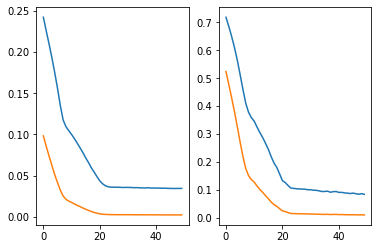

In [38]:
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(confirmed_history.history["mae"])
ax1.plot(confirmed_history.history["mse"])
ax2=fig.add_subplot(122)
ax2.plot(confirmed_history.history["val_mae"])
ax2.plot(confirmed_history.history["val_mse"])
plt.show()